In [7]:
import scanpy as sc
import numpy as np
import scprep
from anndata import AnnData
import phate
from phate.cluster import kmeans
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import magic

In [5]:
datapath = 'adata_sea_ad_mtg_rna_phate.h5ad'
# Load the file
adata = sc.read_h5ad(datapath, backed='r')

In [11]:
data_x = adata[:,:].X

In [17]:
braak_to_int_map = {
    "Reference": 0.0,
    "Braak 0": 1.0,
    "Braak II": 2.0,
    "Braak III": 3.0,
    "Braak IV": 4.0,
    "Braak V": 5.0,
    "Braak VI": 6.0
}

In [23]:
braaks = adata.obs["Braak"].apply(lambda x: braak_to_int_map[x]).astype(float).values

In [25]:
dataxw_braak = pd.DataFrame(data_x.toarray())
dataxw_braak["Braak"] = braaks

In [26]:
dataxw_braak

0    1    2    3         4         5         6    7    8    9  ...  \
0      0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  ...   
1      0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  ...   
2      0.0  0.0  0.0  0.0  1.806407  0.000000  0.000000  0.0  0.0  0.0  ...   
3      0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  ...   
4      0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  ...   
...    ...  ...  ...  ...       ...       ...       ...  ...  ...  ...  ...   
13995  0.0  0.0  0.0  0.0  1.025793  0.000000  0.769084  0.0  0.0  0.0  ...   
13996  0.0  0.0  0.0  0.0  0.000000  0.952653  0.952653  0.0  0.0  0.0  ...   
13997  0.0  0.0  0.0  0.0  0.000000  0.000000  0.929981  0.0  0.0  0.0  ...   
13998  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.0  ...   
13999  0.0  0.0  0.0  0.0  0.000000  0.000000  1.074615  0.0  0.0  0.0  ...   

       30756  30757     30758     30759  30760  30761  30762  30763  30764  \
0        0.0    0.0  0.000000  0.000000    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0  0.000000  1.479480    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0  0.000000  0.000000    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0  0.000000  1.303920    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0  0.000000  1.338024    0.0    0.0    0.0    0.0    0.0   
...      ...    ...       ...       ...    ...    ...    ...    ...    ...   
13995    0.0    0.0  0.562623  1.322685    0.0    0.0    0.0    0.0    0.0   
13996    0.0    0.0  0.000000  0.000000    0.0    0.0    0.0    0.0    0.0   
13997    0.0    0.0  0.000000  0.000000    0.0    0.0    0.0    0.0    0.0   
13998    0.0    0.0  0.000000  0.000000    0.0    0.0    0.0    0.0    0.0   
13999    0.0    0.0  0.000000  1.074615    0.0    0.0    0.0    0.0    0.0   

       Braak  
0        4.0  
1        4.0  
2        4.0  
3        4.0  
4        4.0  
...      ...  
13995    1.0  
13996    1.0  
13997    1.0  
13998    1.0  
13999    1.0  

[14000 rows x 30766 columns]

In [27]:
# MAGIC
magic_op = magic.MAGIC()
X_magic_brk = magic_op.fit_transform(dataxw_braak, genes=['Braak'])

Calculating MAGIC...
  Running MAGIC on 14000 cells and 30766 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 40.03 seconds.
    Calculating KNN search...
    Calculated KNN search in 14.46 seconds.
    Calculating affinities...
    Calculated affinities in 14.85 seconds.
  Calculated graph and diffusion operator in 77.92 seconds.
  Calculating imputation...
Calculated MAGIC in 78.74 seconds.


NameError: name 'X_magic' is not defined

<Figure size 2500x2000 with 0 Axes>

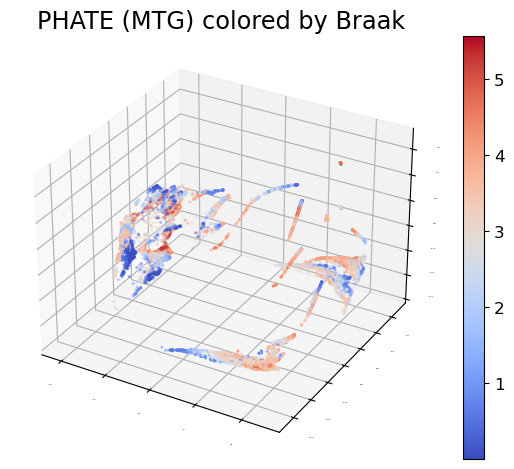

In [56]:
# Plot the clusters
fig = plt.figure(figsize=(25, 20))
ax = scprep.plot.scatter3d(adata.obsm['X_phate'], 
                        title=f'PHATE (MTG) colored by Braak', 
                        c=X_magic_brk, cmap='coolwarm', 
                        legend_title='', legend_loc='lower left', fontsize=10)
ax.tick_params(axis='x', labelsize=0)
ax.tick_params(axis='y', labelsize=0)
ax.tick_params(axis='z', labelsize=0)
plt.tight_layout()
plt.show()


In [32]:
adata.obs["Class"].value_counts()

Neuronal: Glutamatergic        7706
Neuronal: GABAergic            3785
Non-neuronal and Non-neural    2509
Name: Class, dtype: int64

In [33]:
adata.obs["Subclass"].value_counts()

L2/3 IT            3277
L4 IT              1750
L5 IT              1376
Vip                1136
Oligodendrocyte    1008
Pvalb               946
Astrocyte           710
Sst                 651
L6 IT               454
Lamp5               408
Microglia-PVM       401
OPC                 317
L6 IT Car3          275
Sncg                232
L5/6 NP             204
Lamp5 Lhx6          203
L6 CT               194
L6b                 156
Chandelier          113
Pax6                 87
VLMC                 51
Endothelial          22
L5 ET                20
Sst Chodl             9
Name: Subclass, dtype: int64

In [52]:
subclass_map = {
   "Microglia-PVM": "Microglia",
   "Astrocyte": "Astrocyte",
   "Endothelial": "Endothelial",
}
subclass_label = adata.obs["Subclass"].apply(lambda x: subclass_map[x] if x in subclass_map else "Other")

In [35]:
adata.obs["Supertype"].value_counts()

L2/3 IT_1           1361
L4 IT_2             1298
L2/3 IT_6            674
L5 IT_2              579
Oligo_2              530
                    ... 
Monocyte               3
Pericyte_2-SEAAD       3
Endo_1                 2
L6b_5                  1
SMC-SEAAD              1
Name: Supertype, Length: 139, dtype: int64

In [34]:
adata.obs.columns

Index(['sample_id', 'Neurotypical reference', 'Donor ID', 'Organism',
       'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)',
       'Race (choice=Black/ African American)',
       ...
       'Used in analysis', 'Class confidence', 'Class', 'Subclass confidence',
       'Subclass', 'Supertype confidence', 'Supertype (non-expanded)',
       'Supertype', 'Continuous Pseudo-progression Score', 'phate_cluster'],
      dtype='object', length=135)

<Figure size 2500x2000 with 0 Axes>

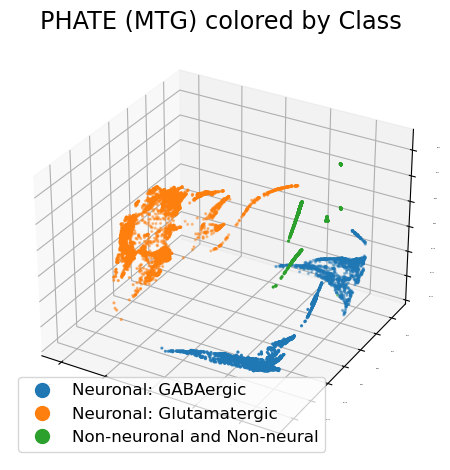

In [46]:
# Plot the clusters
fig = plt.figure(figsize=(25, 20))
ax = scprep.plot.scatter3d(adata.obsm['X_phate'], 
                        title=f'PHATE (MTG) colored by Class', 
                        c=adata.obs["Class"], 
                        legend_title='', legend_loc='lower left', fontsize=10)
# Removing the ticks from the axes
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
ax.tick_params(axis='x', labelsize=0)
ax.tick_params(axis='y', labelsize=0)
ax.tick_params(axis='z', labelsize=0)
plt.tight_layout()
plt.show()


<Figure size 2500x2000 with 0 Axes>

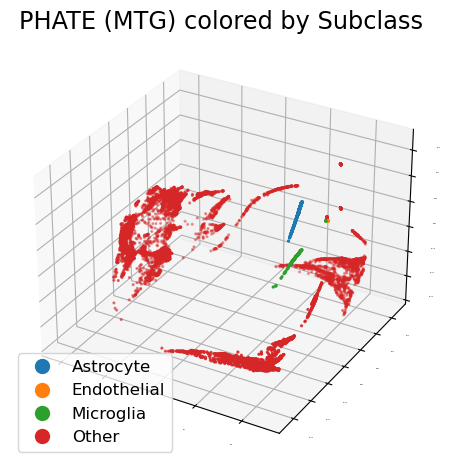

In [55]:
# Plot the clusters
fig = plt.figure(figsize=(25, 20))
ax = scprep.plot.scatter3d(adata.obsm['X_phate'], 
                        title=f'PHATE (MTG) colored by Subclass', 
                        c=subclass_label, 
                        legend_title='', legend_loc='lower left', fontsize=10)
ax.tick_params(axis='x', labelsize=0)
ax.tick_params(axis='y', labelsize=0)
ax.tick_params(axis='z', labelsize=0)
plt.tight_layout()
plt.show()


<Figure size 5000x4000 with 0 Axes>

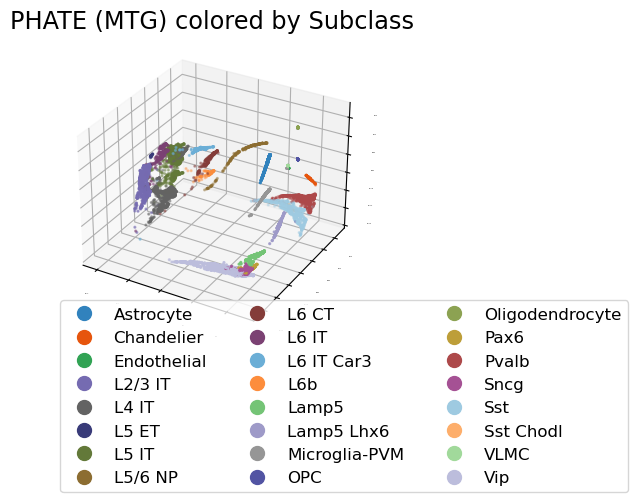

In [107]:
# Plot the clusters
fig = plt.figure(figsize=(50, 40))
ax = scprep.plot.scatter3d(adata.obsm['X_phate'], 
                        title=f'PHATE (MTG) colored by Subclass', 
                        c=adata.obs["Subclass"], 
                        legend_title='', legend_loc=(0, -.5))
ax.tick_params(axis='x', labelsize=0)
ax.tick_params(axis='y', labelsize=0)
ax.tick_params(axis='z', labelsize=0)
plt.tight_layout()
plt.show()


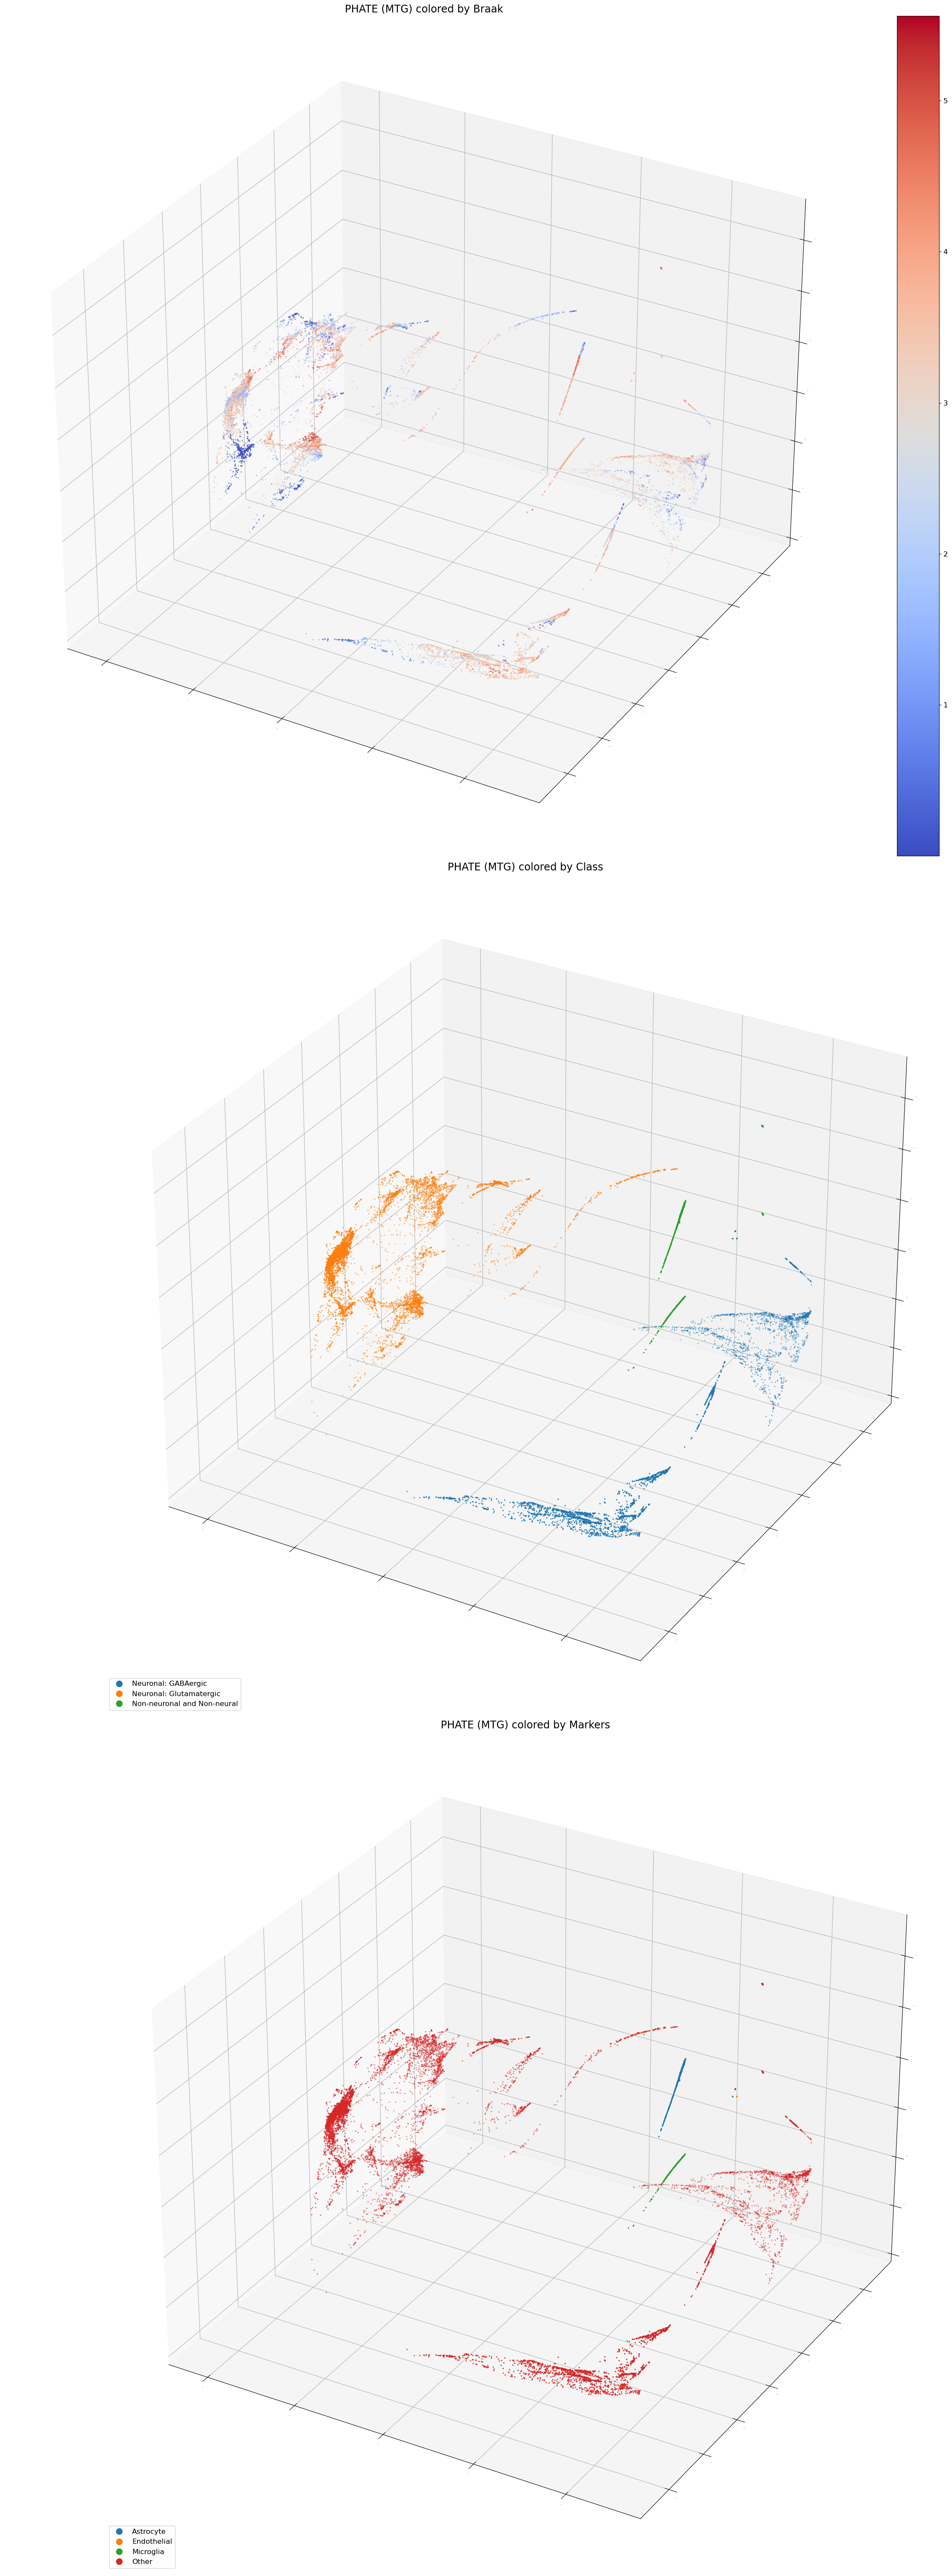

In [57]:
# import scprep
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # This is necessary for 3D plotting

# Creating a single figure with three subplots
fig = plt.figure(figsize=(25, 60))  # Adjusted figure size for 3 subplots

# First subplot
ax1 = fig.add_subplot(3, 1, 1, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax1,
                      title='PHATE (MTG) colored by Braak',
                      c=X_magic_brk, cmap='coolwarm',
                      legend_title='', legend_loc='lower left', fontsize=10)
ax1.tick_params(axis='x', labelsize=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='z', labelsize=0)

# Second subplot
ax2 = fig.add_subplot(3, 1, 2, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax2,
                      title='PHATE (MTG) colored by Class',
                      c=adata.obs["Class"],
                      legend_title='', legend_loc='lower left', fontsize=10)
ax2.tick_params(axis='x', labelsize=0)
ax2.tick_params(axis='y', labelsize=0)
ax2.tick_params(axis='z', labelsize=0)

# Third subplot
ax3 = fig.add_subplot(3, 1, 3, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax3,
                      title='PHATE (MTG) colored by Markers',
                      c=subclass_label,
                      legend_title='', legend_loc='lower left', fontsize=10)
ax3.tick_params(axis='x', labelsize=0)
ax3.tick_params(axis='y', labelsize=0)
ax3.tick_params(axis='z', labelsize=0)

plt.tight_layout()
plt.show()


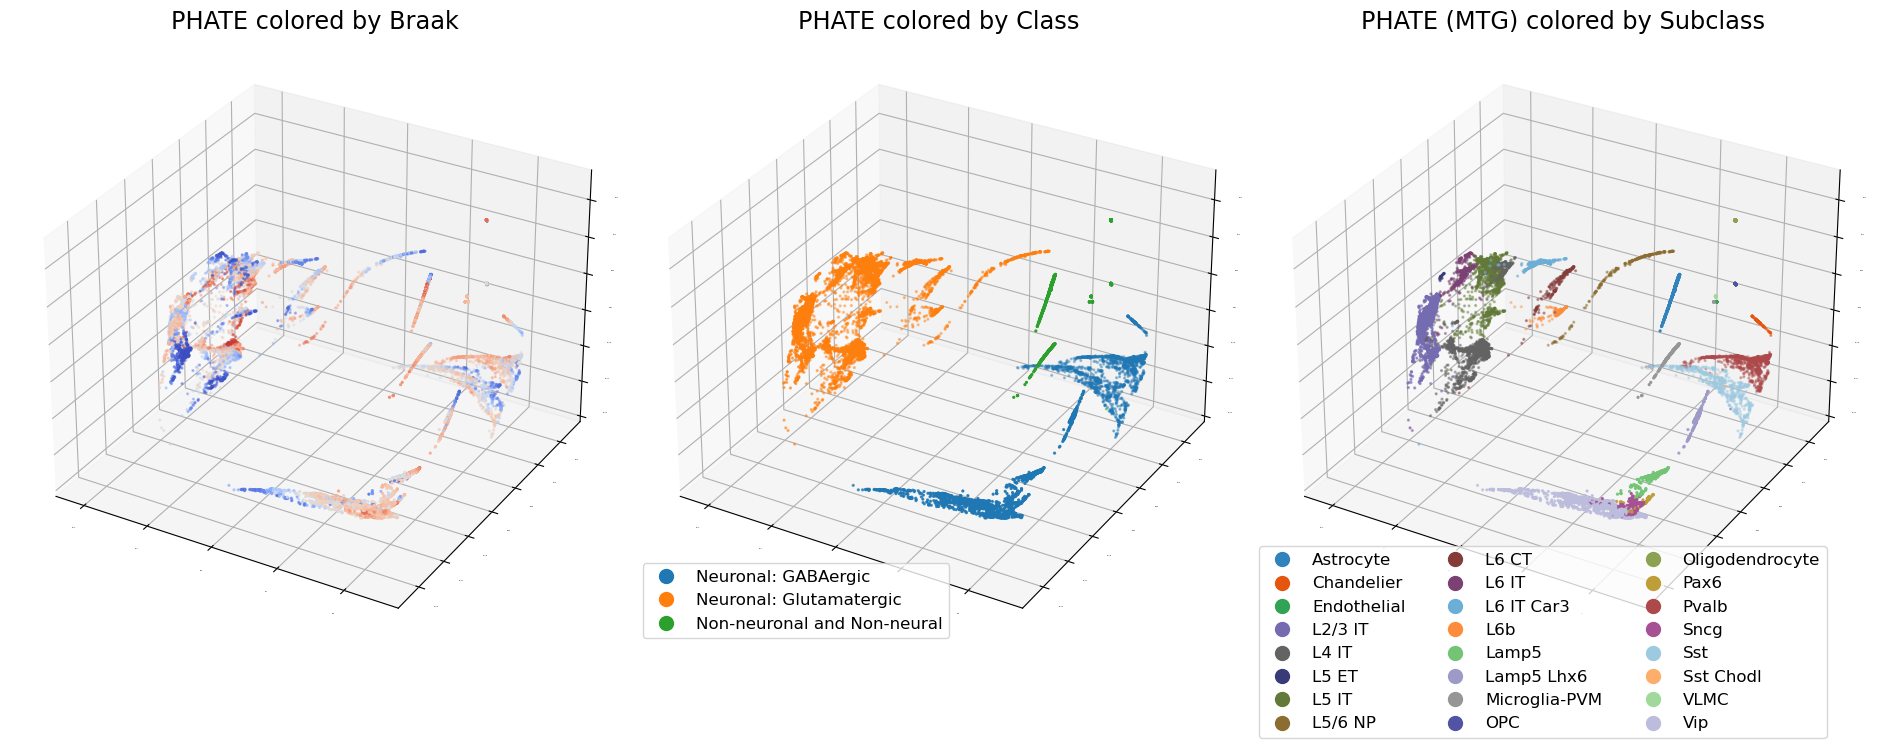

In [119]:
import matplotlib.patches as mpatches

# Define a function to create a custom legend
def create_custom_legend(ax, cmap, labels, fontsize):
    # Create legend handles
    handles = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in range(len(labels))]
    # Create and add the legend to the plot
    ax.legend(handles=handles, loc='lower left', fontsize=fontsize)

# Creating a single figure with three subplots, side by side
fig = plt.figure(figsize=(20, 10))  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax1,
                      title='PHATE colored by Braak',
                      c=X_magic_brk, cmap='coolwarm',
                       legend=False,
                    )
ax1.tick_params(axis='x', labelsize=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='z', labelsize=0)

# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax2,
                      title='PHATE colored by Class',
                      c=adata.obs["Class"],
                      legend_title='', legend_loc='lower left')
ax2.tick_params(axis='x', labelsize=0)
ax2.tick_params(axis='y', labelsize=0)
ax2.tick_params(axis='z', labelsize=0)

# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
# scprep.plot.scatter3d(adata.obsm['X_phate'],
#                       ax=ax3,
#                       title='PHATE colored by Markers',
#                       c=subclass_label,
#                       legend_title='', legend_loc='lower left',)

scprep.plot.scatter3d(adata.obsm['X_phate'], 
                      ax=ax3,
                        title=f'PHATE (MTG) colored by Subclass', 
                        c=adata.obs["Subclass"], 
                        legend_title='', legend_loc=(0, -.15))

ax3.tick_params(axis='x', labelsize=0)
ax3.tick_params(axis='y', labelsize=0)
ax3.tick_params(axis='z', labelsize=0)

plt.tight_layout()
plt.show()


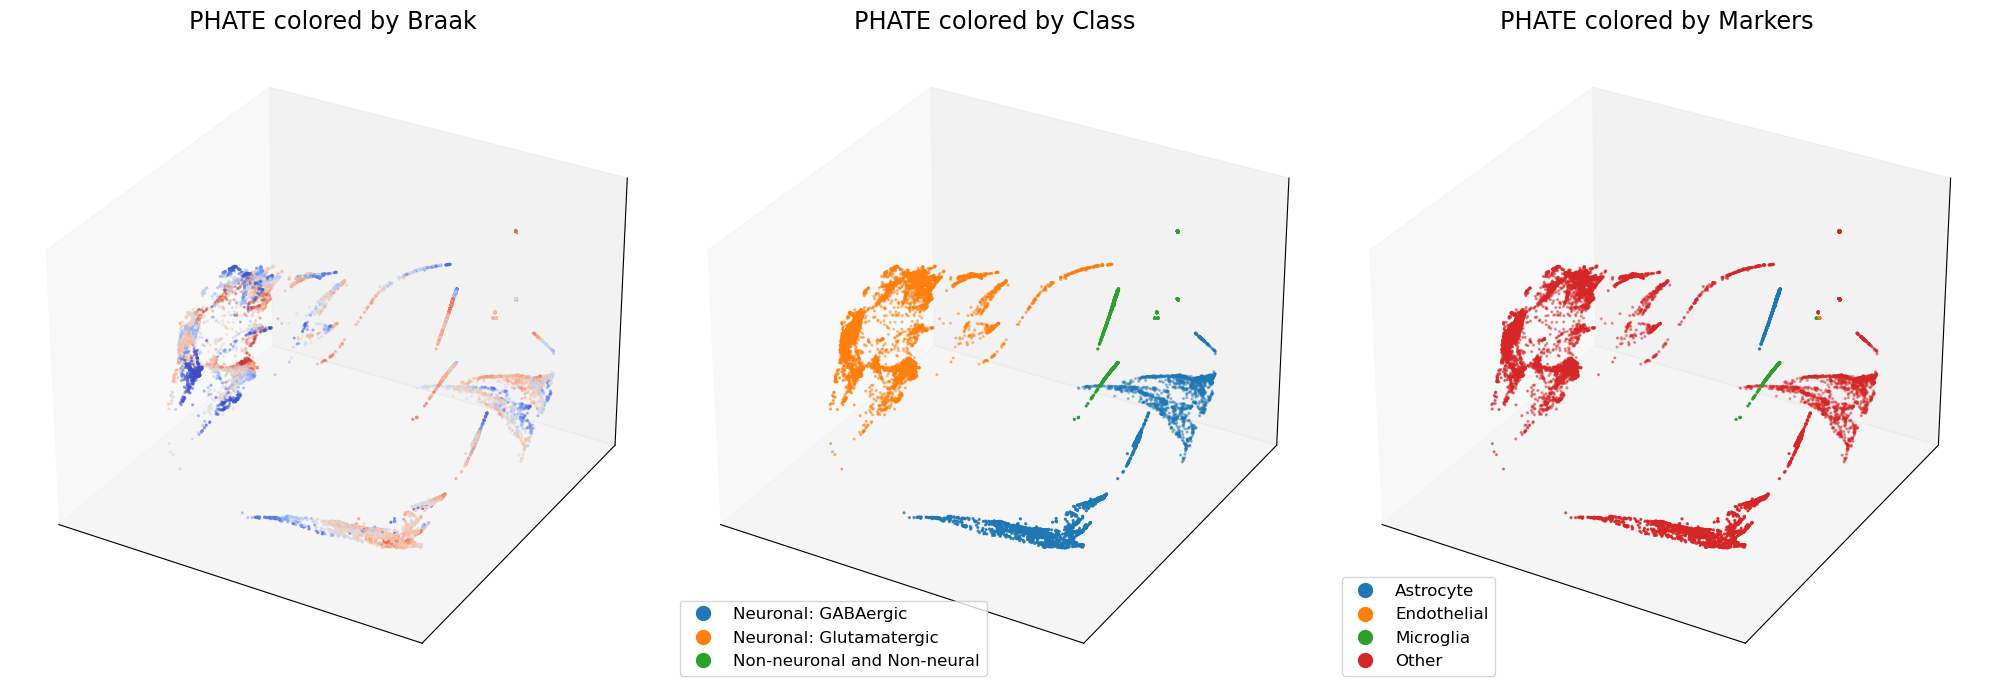

In [94]:
# import matplotlib.patches as mpatches

# # Define a function to create a custom legend
# def create_custom_legend(ax, cmap, labels, fontsize):
#     # Create legend handles
#     handles = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in range(len(labels))]
#     # Create and add the legend to the plot
#     ax.legend(handles=handles, loc='lower left', fontsize=fontsize)

# # Creating a single figure with three subplots, side by side
# fig = plt.figure(figsize=(20, 10))  # Adjusted figure size for side-by-side subplots

# # First subplot
# ax1 = fig.add_subplot(1, 3, 1, projection='3d')
# scatter1 = scprep.plot.scatter3d(adata.obsm['X_phate'],
#                       ax=ax1,
#                       title='PHATE colored by Braak',
#                       c=X_magic_brk, cmap='coolwarm',
#                        legend=False,
#                     )

# ax1.set_xticks([])
# ax1.set_yticks([])
# ax1.set_zticks([])
# # Second subplot
# ax2 = fig.add_subplot(1, 3, 2, projection='3d')
# scprep.plot.scatter3d(adata.obsm['X_phate'],
#                       ax=ax2,
#                       title='PHATE colored by Class',
#                       c=adata.obs["Class"],
#                       legend_title='', legend_loc='lower left')

# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_zticks([])
# # Third subplot
# ax3 = fig.add_subplot(1, 3, 3, projection='3d')
# scprep.plot.scatter3d(adata.obsm['X_phate'],
#                       ax=ax3,
#                       title='PHATE colored by Markers',
#                       c=subclass_label,
#                       legend_title='', legend_loc='lower left',)
# ax3.set_xticks([])
# ax3.set_yticks([])
# ax3.set_zticks([])


# plt.tight_layout()
# plt.show()


AttributeError: 'Axes3DSubplot' object has no attribute 'get_array'

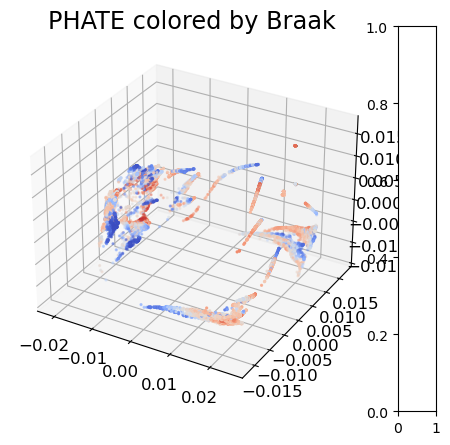

In [103]:

# Creating a single figure with three subplots, side by side
fig = plt.figure(figsize=(20, 10))  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
scatter1 = scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax1,
                      title='PHATE colored by Braak',
                      c=X_magic_brk, cmap='coolwarm',
                    legend=False,
                    )
cbar1 = fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=10)
cbar1.set_label('Braak Stage', rotation=270, labelpad=15)

ax1.tick_params(axis='x', labelsize=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='z', labelsize=0)

# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax2,
                      title='PHATE colored by Class',
                      c=adata.obs["Class"],
                      legend_title='', legend_loc='lower left')
ax2.tick_params(axis='x', labelsize=0)
ax2.tick_params(axis='y', labelsize=0)
ax2.tick_params(axis='z', labelsize=0)

# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax3,
                      title='PHATE colored by Markers',
                      c=subclass_label,
                      legend_title='', legend_loc='lower left',)
ax3.tick_params(axis='x', labelsize=0)
ax3.tick_params(axis='y', labelsize=0)
ax3.tick_params(axis='z', labelsize=0)

plt.tight_layout()
plt.show()


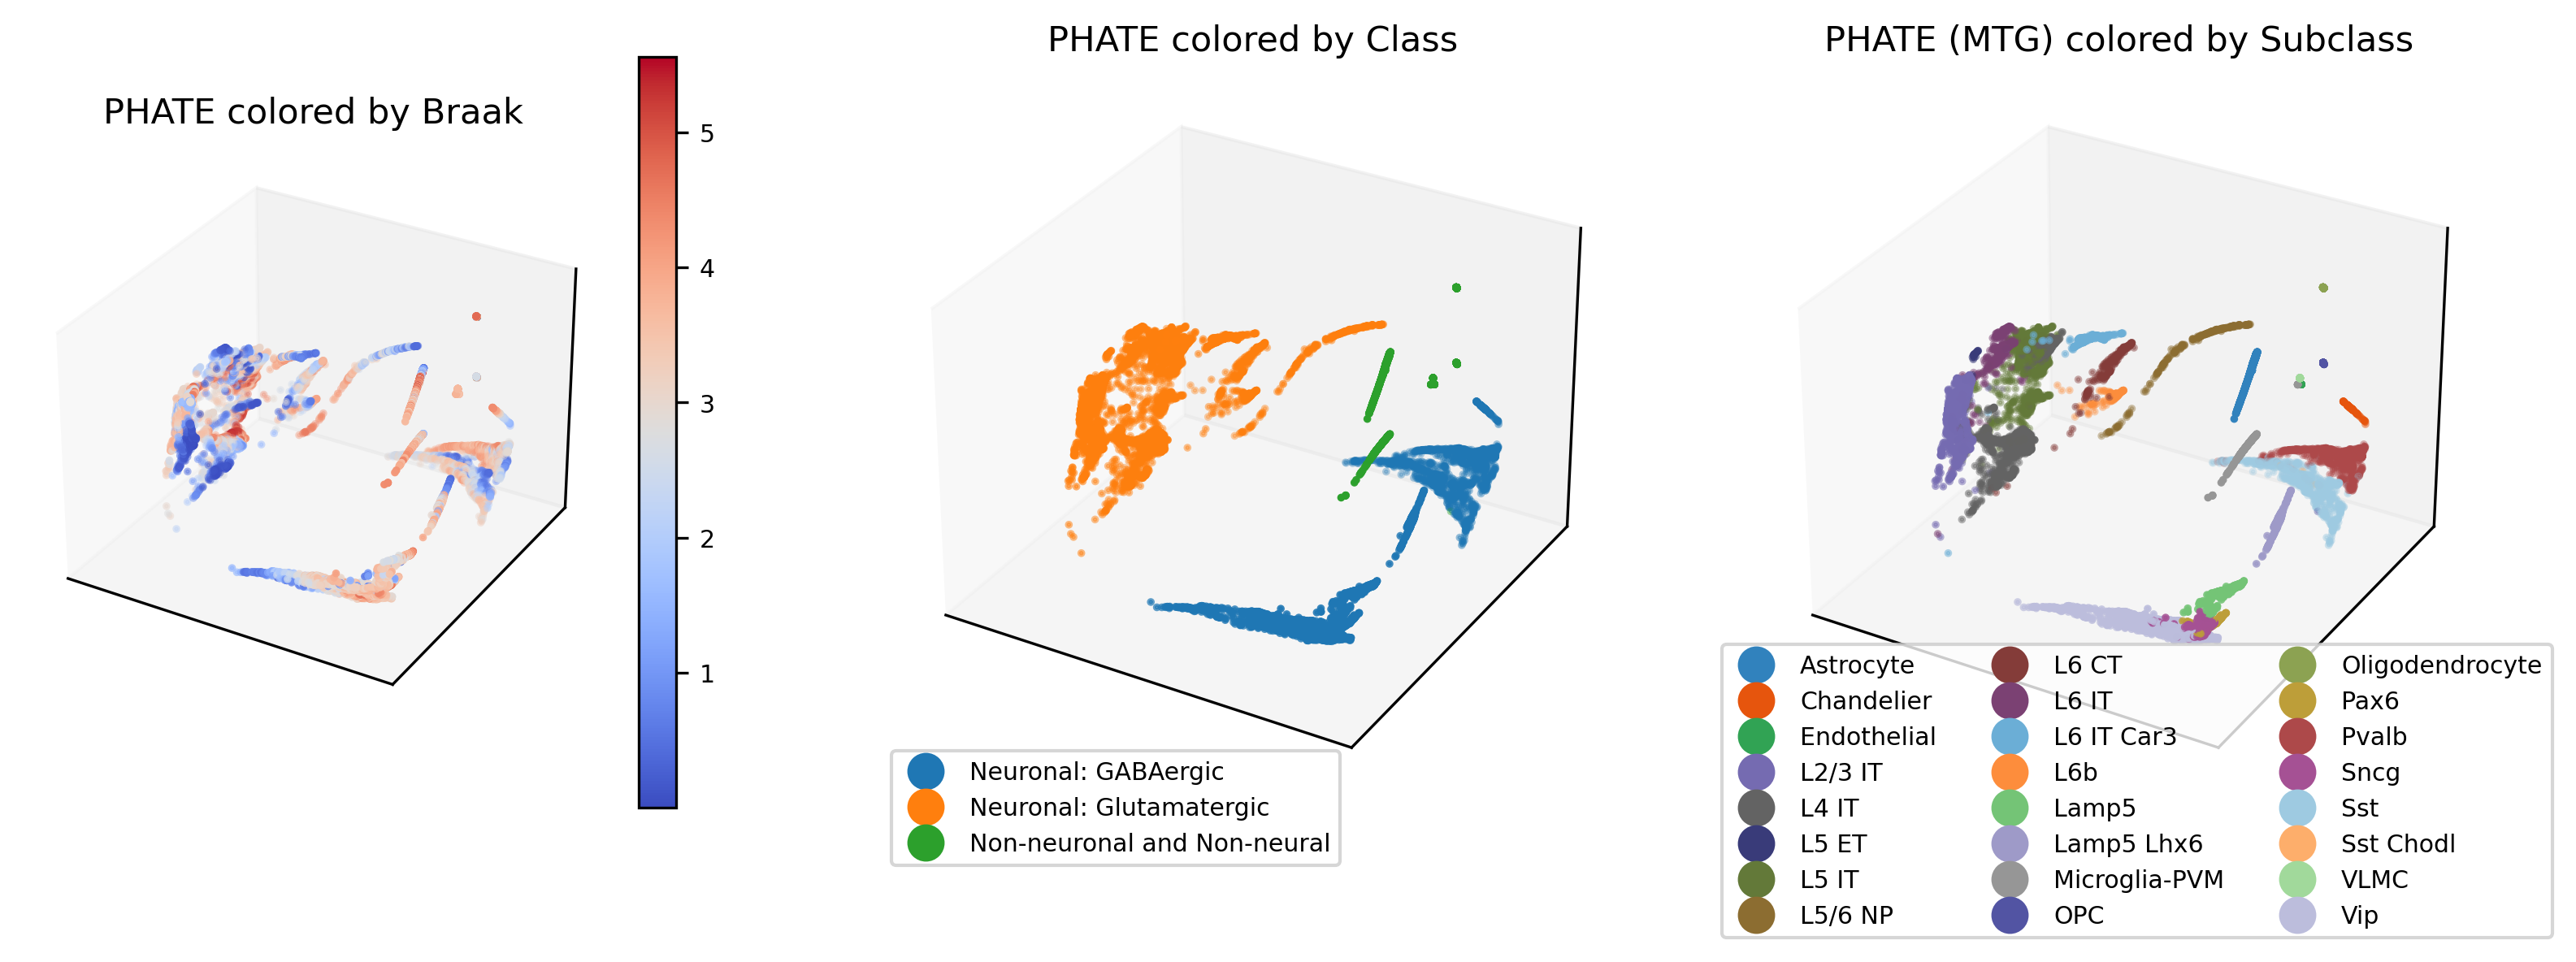

In [150]:

# Define a function to create a custom legend
def create_custom_legend(ax, cmap, labels, fontsize):
    # Create legend handles
    handles = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in range(len(labels))]
    # Create and add the legend to the plot
    ax.legend(handles=handles, loc='lower left', fontsize=fontsize)

# Creating a single figure with three subplots, side by side
fig = plt.figure(figsize=(13, 4),dpi=300)  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax1,
                      title='PHATE colored by Braak',
                      c=X_magic_brk, cmap='coolwarm',
                    ticks=False,fontsize=6
                    )




# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax2,
                      title='PHATE colored by Class',
                      c=adata.obs["Class"],
                      legend_title='', legend_loc=(0, -.1),ticks=False,fontsize=6)




# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
# scprep.plot.scatter3d(adata.obsm['X_phate'],
#                       ax=ax3,
#                       title='PHATE colored by Markers',
#                       c=subclass_label,
#                       legend_title='', legend_loc='lower left',)

scprep.plot.scatter3d(adata.obsm['X_phate'], 
                      ax=ax3,
                        title=f'PHATE (MTG) colored by Subclass', 
                        c=adata.obs["Subclass"], 
                        legend_title='', legend_loc=(-0.05, -.2),ticks=False, fontsize=6)
# ax3.set_title('PHATE colored by Subclass', fontsize=10)




# plt.tight_layout()
plt.show()


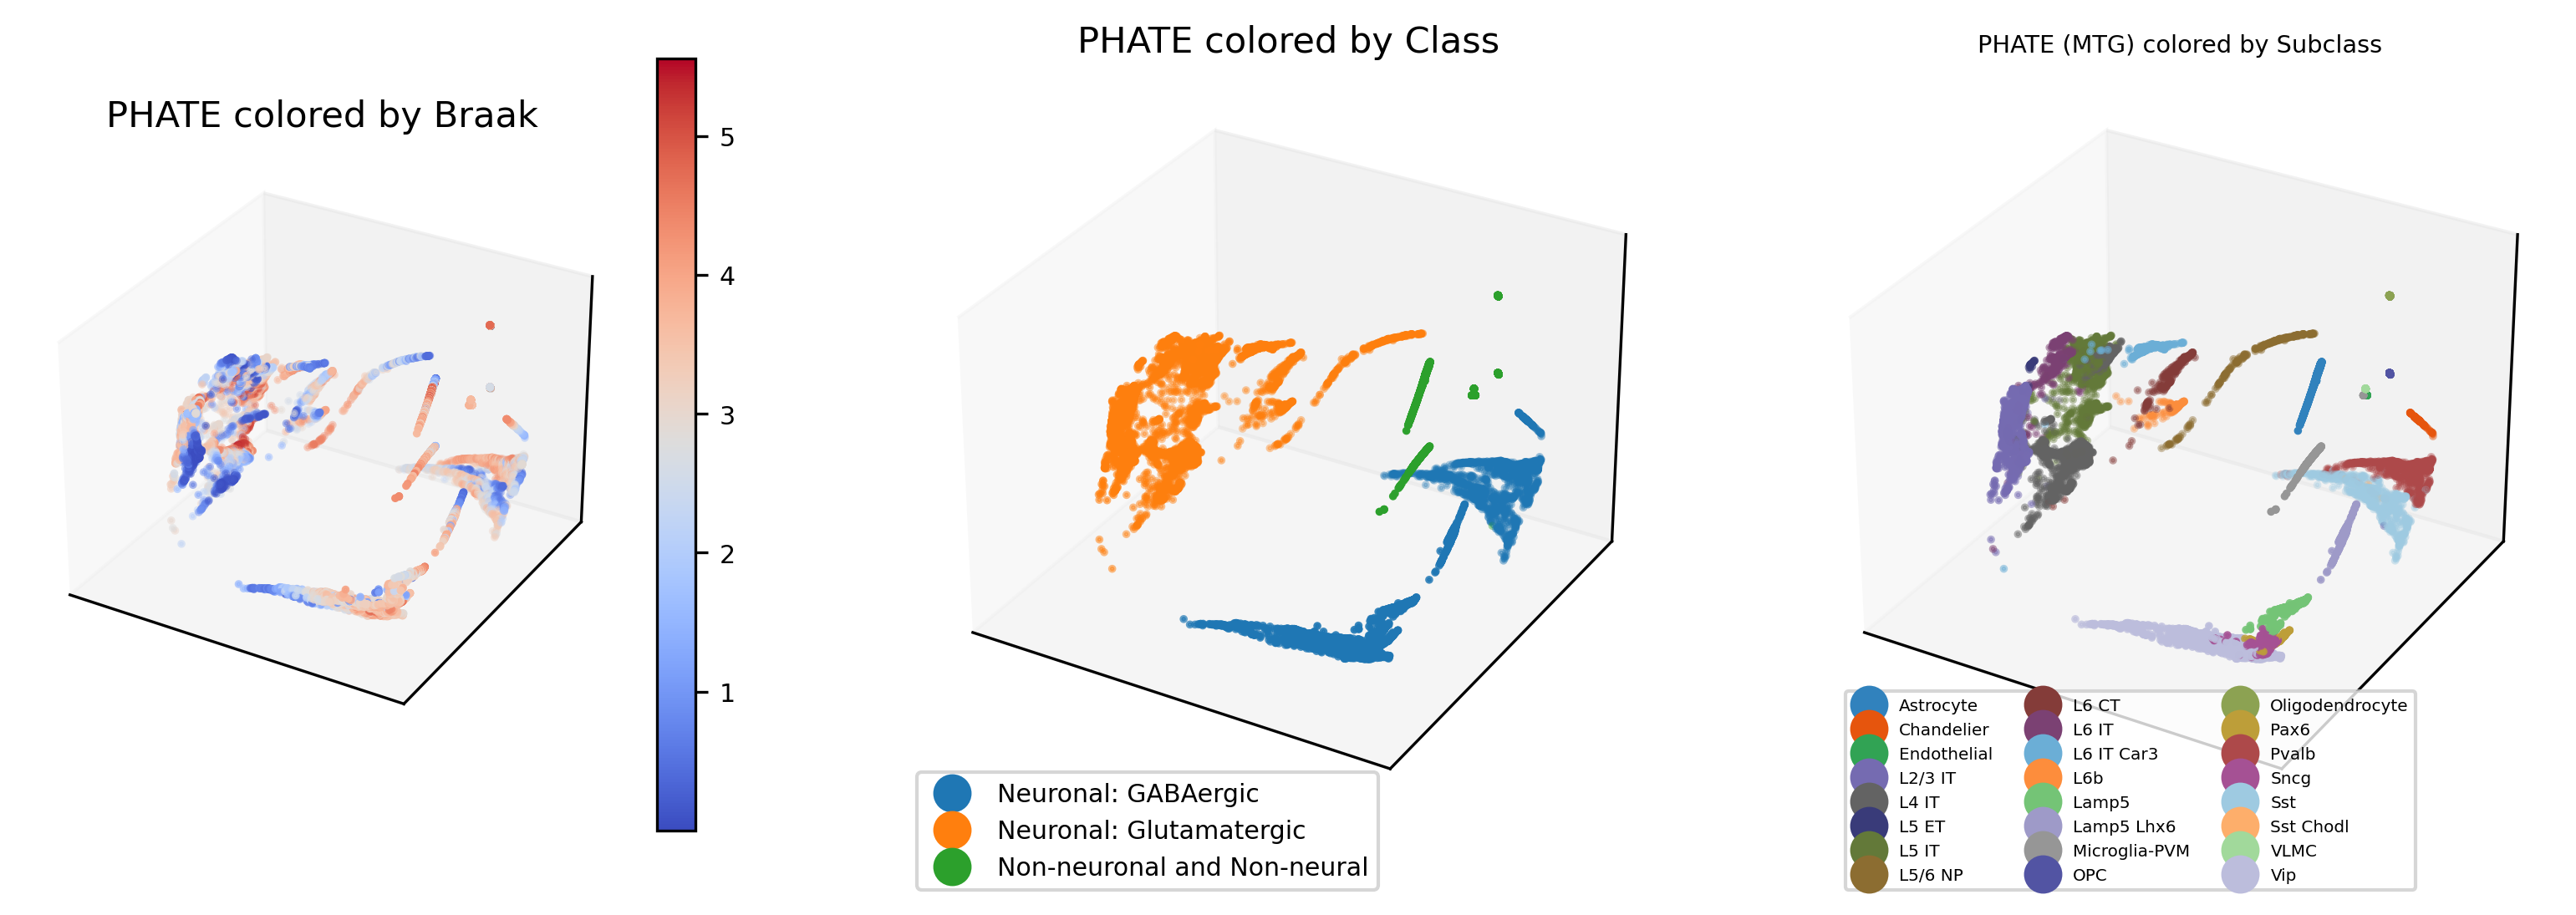

In [158]:

# Define a function to create a custom legend
def create_custom_legend(ax, cmap, labels, fontsize):
    # Create legend handles
    handles = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in range(len(labels))]
    # Create and add the legend to the plot
    ax.legend(handles=handles, loc='lower left', fontsize=fontsize)

# Creating a single figure with three subplots, side by side
fig = plt.figure(figsize=(13, 4),dpi=300)  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax1,
                      title='PHATE colored by Braak',
                      c=X_magic_brk, cmap='coolwarm',
                    ticks=False,fontsize=6,
                    )




# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax2,
                      title='PHATE colored by Class',
                      c=adata.obs["Class"],
                      legend_title='', legend_loc=(0, -.1),ticks=False,fontsize=6,)




# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
# scprep.plot.scatter3d(adata.obsm['X_phate'],
#                       ax=ax3,
#                       title='PHATE colored by Markers',
#                       c=subclass_label,
#                       legend_title='', legend_loc='lower left',)

scprep.plot.scatter3d(adata.obsm['X_phate'], 
                      ax=ax3,
                        title=f'PHATE (MTG) colored by Subclass', 
                        c=adata.obs["Subclass"], 
                        legend_title='', legend_loc=(0.05, -.1),ticks=False, fontsize=4)
# ax3.set_title('PHATE colored by Subclass', fontsize=10)




# plt.tight_layout()
plt.show()


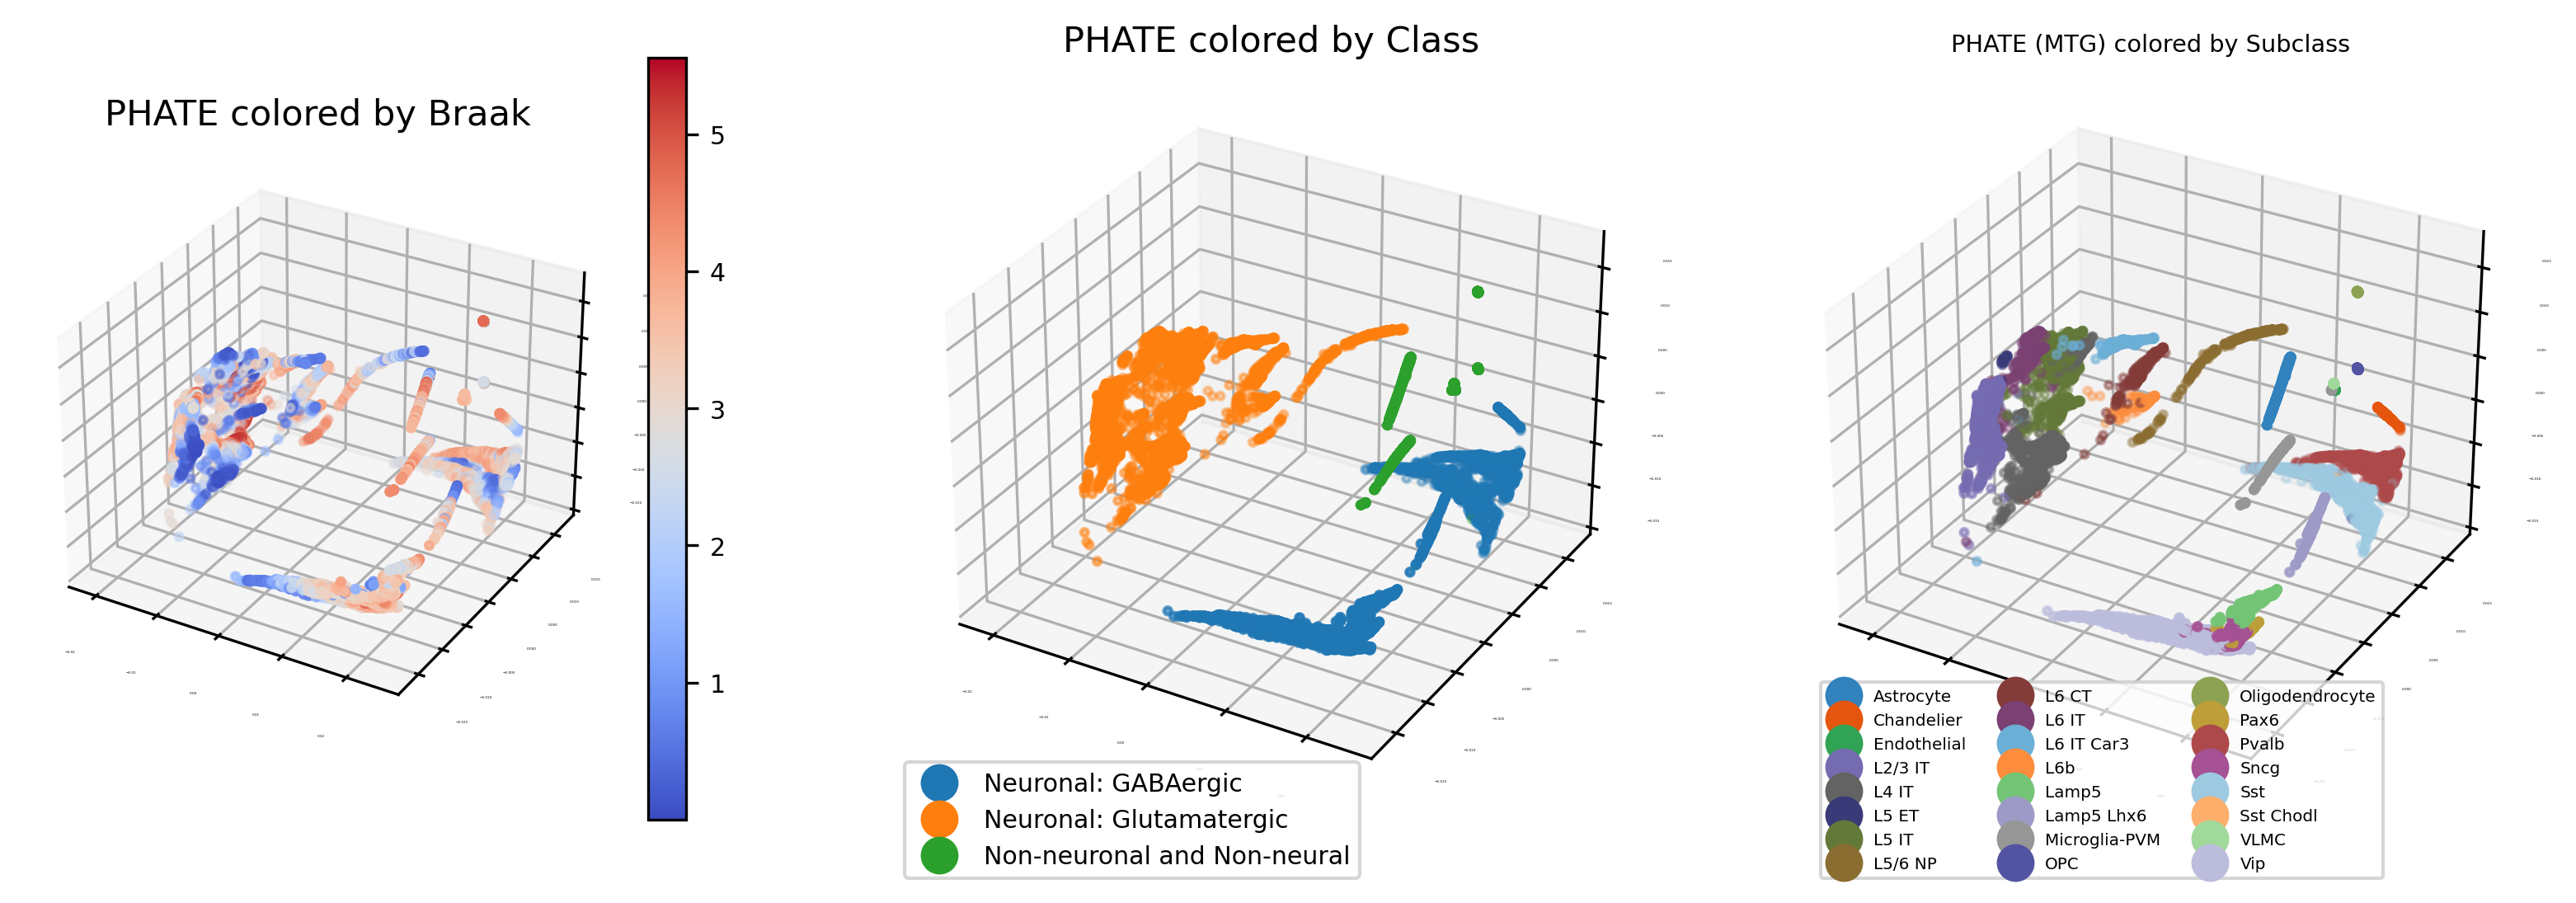

In [161]:
s=5

# Define a function to create a custom legend
def create_custom_legend(ax, cmap, labels, fontsize):
    # Create legend handles
    handles = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in range(len(labels))]
    # Create and add the legend to the plot
    ax.legend(handles=handles, loc='lower left', fontsize=fontsize)

# Creating a single figure with three subplots, side by side
fig = plt.figure(figsize=(13, 4),dpi=300)  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax1,
                      title='PHATE colored by Braak',
                      c=X_magic_brk, cmap='coolwarm',
                    fontsize=6,s=s
                    )




# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
scprep.plot.scatter3d(adata.obsm['X_phate'],
                      ax=ax2,
                      title='PHATE colored by Class',
                      c=adata.obs["Class"],
                      legend_title='', legend_loc=(0, -.1),fontsize=6,
                      s=s,
                      )




# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
# scprep.plot.scatter3d(adata.obsm['X_phate'],
#                       ax=ax3,
#                       title='PHATE colored by Markers',
#                       c=subclass_label,
#                       legend_title='', legend_loc='lower left',)

scprep.plot.scatter3d(adata.obsm['X_phate'], 
                      ax=ax3,
                        title=f'PHATE (MTG) colored by Subclass', 
                        c=adata.obs["Subclass"], 
                        legend_title='', legend_loc=(0.05, -.1), fontsize=4,
                        s=s,
                        )
# ax3.set_title('PHATE colored by Subclass', fontsize=10)

ax1.tick_params(axis='x', labelsize=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='z', labelsize=0)

ax2.tick_params(axis='x', labelsize=0)
ax2.tick_params(axis='y', labelsize=0)
ax2.tick_params(axis='z', labelsize=0)

ax3.tick_params(axis='x', labelsize=0)
ax3.tick_params(axis='y', labelsize=0)
ax3.tick_params(axis='z', labelsize=0)


# plt.tight_layout()
plt.show()


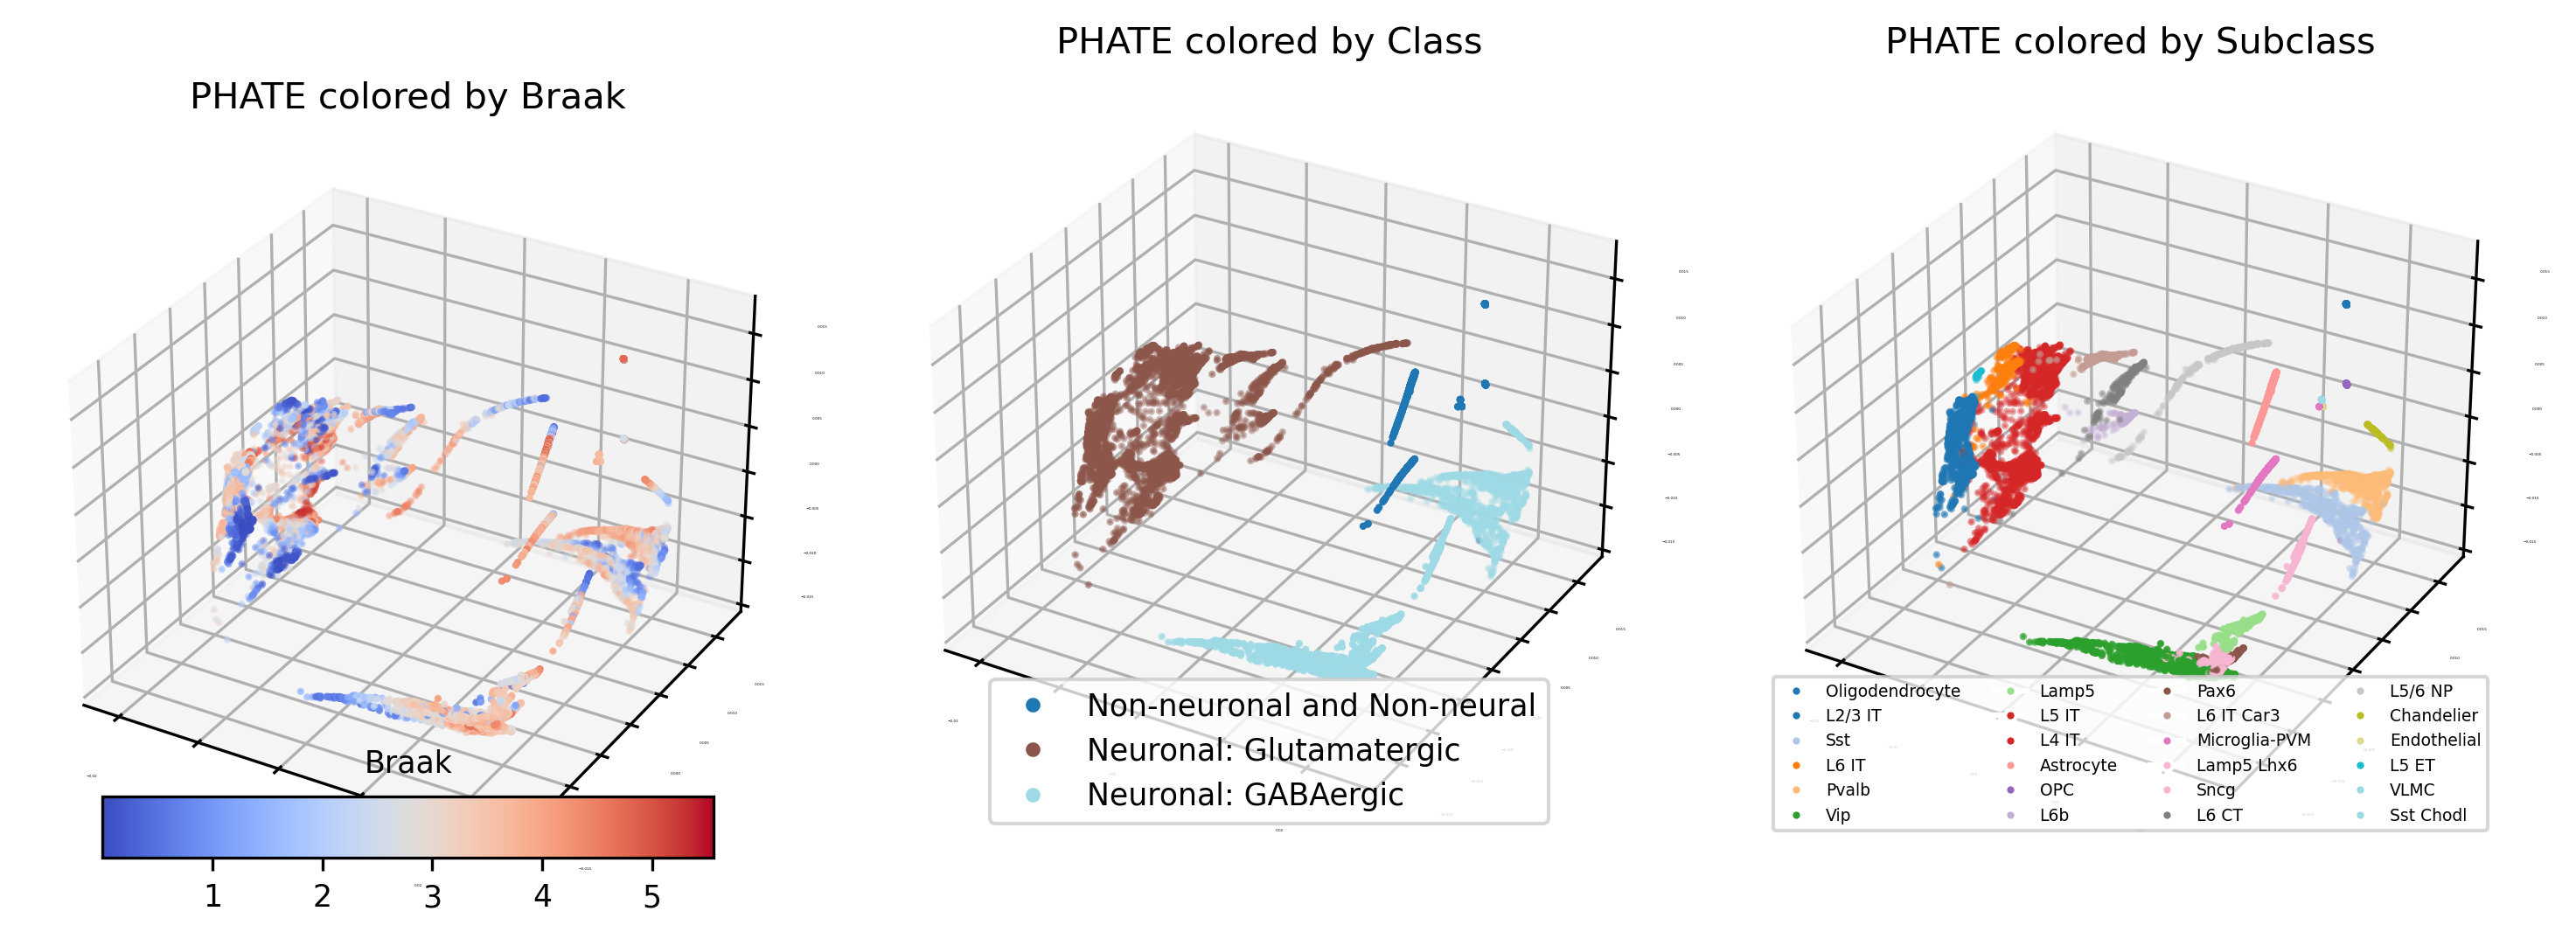

In [221]:
fig = plt.figure(figsize=(10, 4),dpi=300)  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

scatter1 = ax1.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], c=X_magic_brk, cmap='coolwarm',s=1)
cbar = plt.colorbar(scatter1, ax=ax1, shrink=0.8, aspect=10, orientation='horizontal', pad=-0.1)
cbar.set_label('Braak', rotation=0, fontsize='small', labelpad=-45)
cbar.ax.tick_params(labelsize='small')
ax1.set_title('PHATE colored by Braak', fontsize=10)
# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')

classes = adata.obs["Class"].astype(str)
unique_classes = classes.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))
class_to_color = dict(zip(unique_classes, colors))
color_values = classes.map(class_to_color)
scatter2 = ax2.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=5)
                   for class_name, color in class_to_color.items()]
ax2.legend(handles=legend_elements, loc='lower center', fontsize='small')
ax2.set_title('PHATE colored by Class', fontsize=10)
# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
subclasses = adata.obs["Subclass"].astype(str)
unique_subclasses = subclasses.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_subclasses)))
class_to_color = dict(zip(unique_subclasses, colors))
color_values = subclasses.map(class_to_color)

scatter3 = ax3.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=3)
                   for class_name, color in class_to_color.items()]
ax3.legend(handles=legend_elements, loc='lower center', fontsize=4.5, ncol=4)
ax3.set_title('PHATE colored by Subclass', fontsize=10)

ax1.tick_params(axis='x', labelsize=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='z', labelsize=0)

ax2.tick_params(axis='x', labelsize=0)
ax2.tick_params(axis='y', labelsize=0)
ax2.tick_params(axis='z', labelsize=0)

ax3.tick_params(axis='x', labelsize=0)
ax3.tick_params(axis='y', labelsize=0)
ax3.tick_params(axis='z', labelsize=0)


plt.tight_layout()
plt.show()


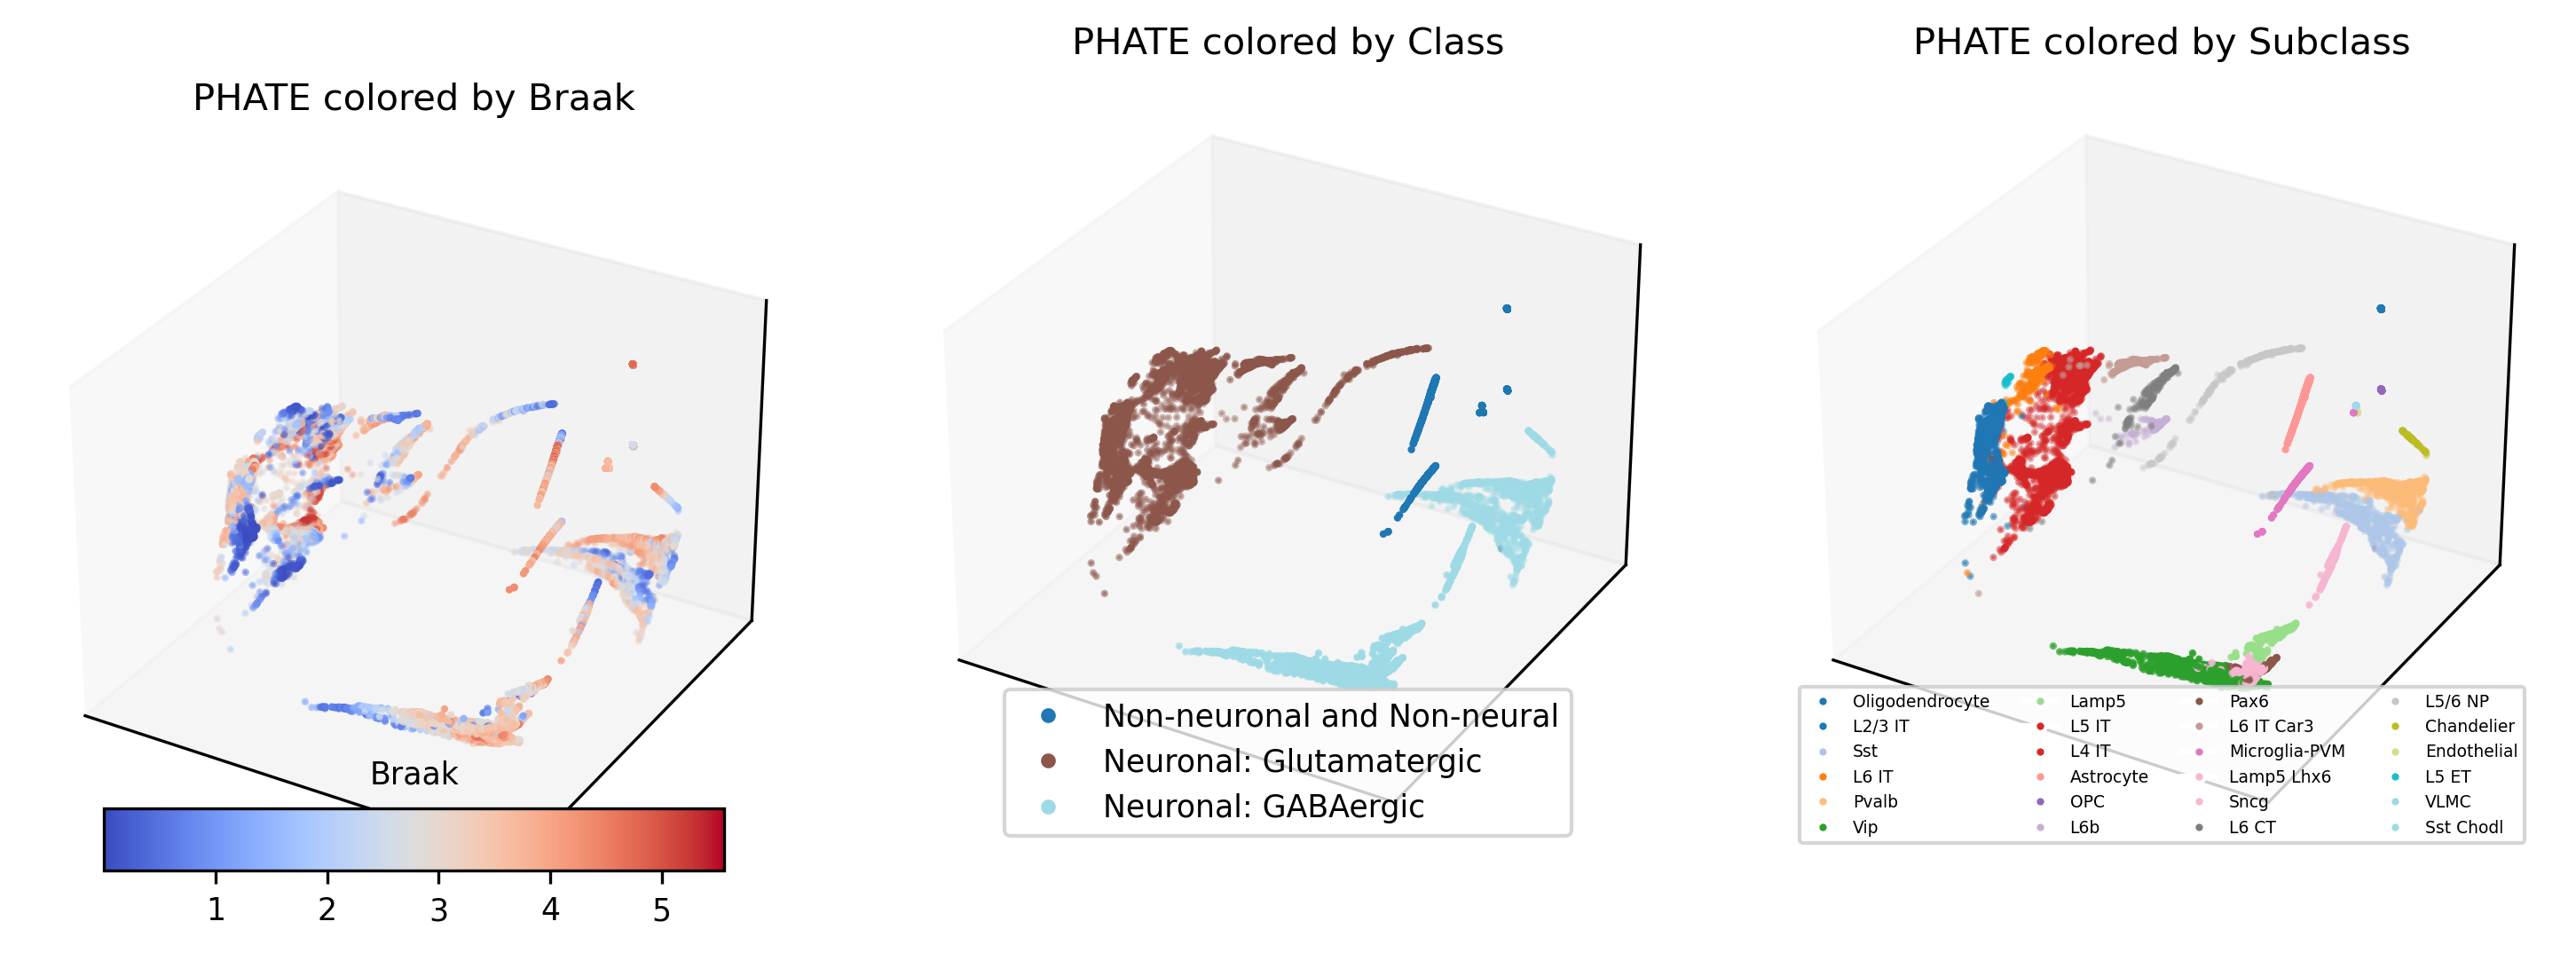

In [230]:
fig = plt.figure(figsize=(10, 4),dpi=300)  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

scatter1 = ax1.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], c=X_magic_brk, cmap='coolwarm',s=1)
cbar = plt.colorbar(scatter1, ax=ax1, shrink=0.8, aspect=10, orientation='horizontal', pad=-0.1, location='bottom')
cbar.set_label('Braak', rotation=0, fontsize='small', labelpad=-45)
cbar.ax.tick_params(labelsize='small')
ax1.set_title('PHATE colored by Braak', fontsize=10)
# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')

classes = adata.obs["Class"].astype(str)
unique_classes = classes.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))
class_to_color = dict(zip(unique_classes, colors))
color_values = classes.map(class_to_color)
scatter2 = ax2.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=5)
                   for class_name, color in class_to_color.items()]
ax2.legend(handles=legend_elements, loc='lower center', fontsize='small')
ax2.set_title('PHATE colored by Class', fontsize=10)
# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
subclasses = adata.obs["Subclass"].astype(str)
unique_subclasses = subclasses.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_subclasses)))
class_to_color = dict(zip(unique_subclasses, colors))
color_values = subclasses.map(class_to_color)

scatter3 = ax3.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=3)
                   for class_name, color in class_to_color.items()]
ax3.legend(handles=legend_elements, loc='lower center', fontsize=4.5, ncol=4)
ax3.set_title('PHATE colored by Subclass', fontsize=10)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])


# Adjust the layout
fig.subplots_adjust(top=0.85)  # Adjust this value as needed

plt.tight_layout()
plt.show()


In [ ]:
fig = plt.figure(figsize=(10, 4),dpi=300)  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

scatter1 = ax1.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], c=X_magic_brk, cmap='coolwarm',s=1)
cbar = plt.colorbar(scatter1, ax=ax1, shrink=0.8, aspect=10, orientation='horizontal', pad=-0.1)
cbar.set_label('Braak', rotation=0, fontsize='small', labelpad=-40)
cbar.ax.tick_params(labelsize='small')
ax1.set_title('PHATE colored by Braak', fontsize=10)
# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')

classes = adata.obs["Class"].astype(str)
unique_classes = classes.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))
class_to_color = dict(zip(unique_classes, colors))
color_values = classes.map(class_to_color)
scatter2 = ax2.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=5)
                   for class_name, color in class_to_color.items()]
ax2.legend(handles=legend_elements, loc='lower center', fontsize='small')
ax2.set_title('PHATE colored by Class', fontsize=10)
# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
subclasses = adata.obs["Subclass"].astype(str)
unique_subclasses = subclasses.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_subclasses)))
class_to_color = dict(zip(unique_subclasses, colors))
color_values = subclasses.map(class_to_color)

scatter3 = ax3.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=3)
                   for class_name, color in class_to_color.items()]
ax3.legend(handles=legend_elements, loc='lower center', fontsize=4.5, ncol=4)
ax3.set_title('PHATE colored by Subclass', fontsize=10)

ax1.tick_params(axis='x', labelsize=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='z', labelsize=0)

ax2.tick_params(axis='x', labelsize=0)
ax2.tick_params(axis='y', labelsize=0)
ax2.tick_params(axis='z', labelsize=0)

ax3.tick_params(axis='x', labelsize=0)
ax3.tick_params(axis='y', labelsize=0)
ax3.tick_params(axis='z', labelsize=0)


plt.tight_layout()
plt.show()


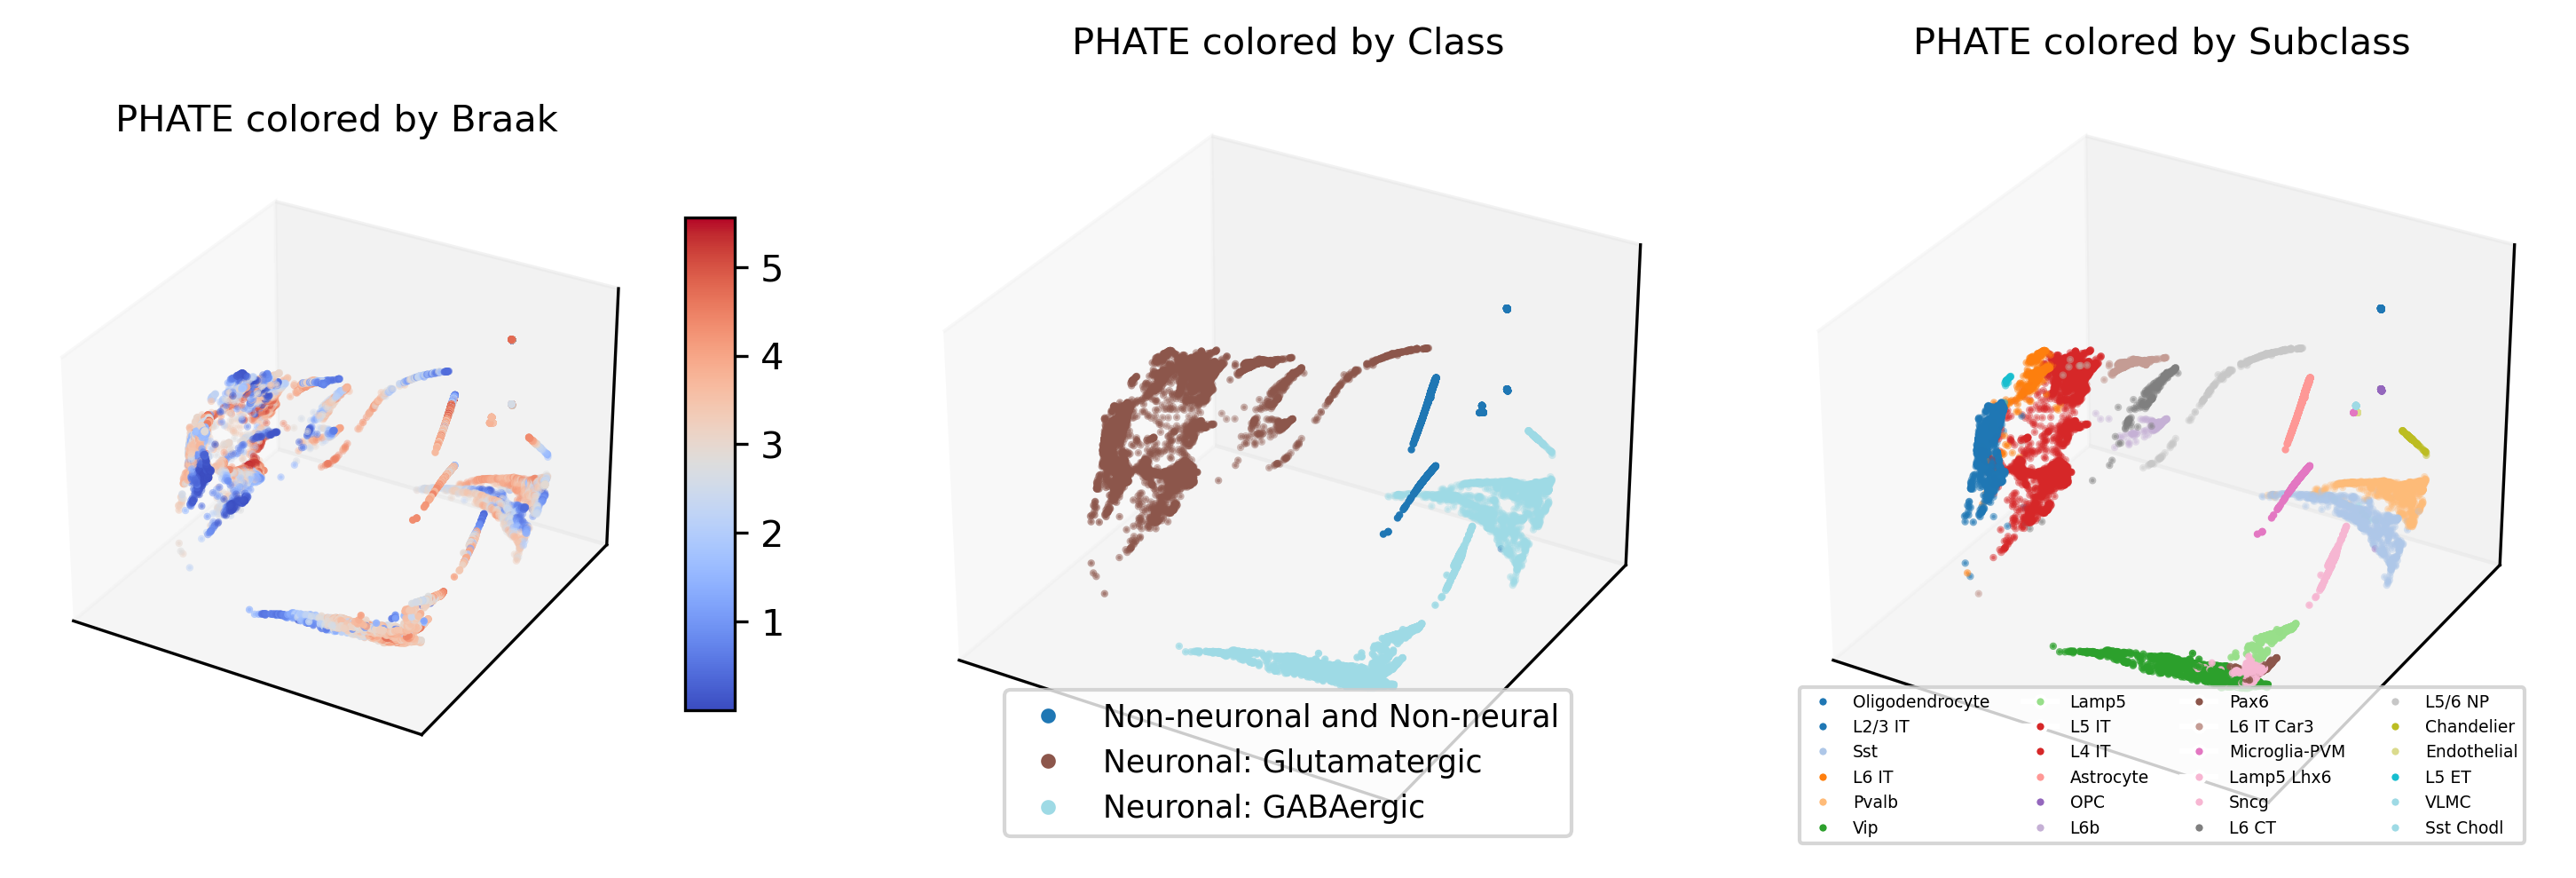

In [203]:
fig = plt.figure(figsize=(10, 4),dpi=300)  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

scatter1 = ax1.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], c=X_magic_brk, cmap='coolwarm',s=1)
plt.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=10)
ax1.set_title('PHATE colored by Braak', fontsize=10)
# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')

classes = adata.obs["Class"].astype(str)
unique_classes = classes.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))
class_to_color = dict(zip(unique_classes, colors))
color_values = classes.map(class_to_color)
scatter2 = ax2.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=5)
                   for class_name, color in class_to_color.items()]
ax2.legend(handles=legend_elements, loc='lower center', fontsize='small')
ax2.set_title('PHATE colored by Class', fontsize=10)
# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
subclasses = adata.obs["Subclass"].astype(str)
unique_subclasses = subclasses.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_subclasses)))
class_to_color = dict(zip(unique_subclasses, colors))
color_values = subclasses.map(class_to_color)

scatter3 = ax3.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=3)
                   for class_name, color in class_to_color.items()]
ax3.legend(handles=legend_elements, loc='lower center', fontsize=4.5, ncol=4)
ax3.set_title('PHATE colored by Subclass', fontsize=10)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])


plt.tight_layout()
plt.show()


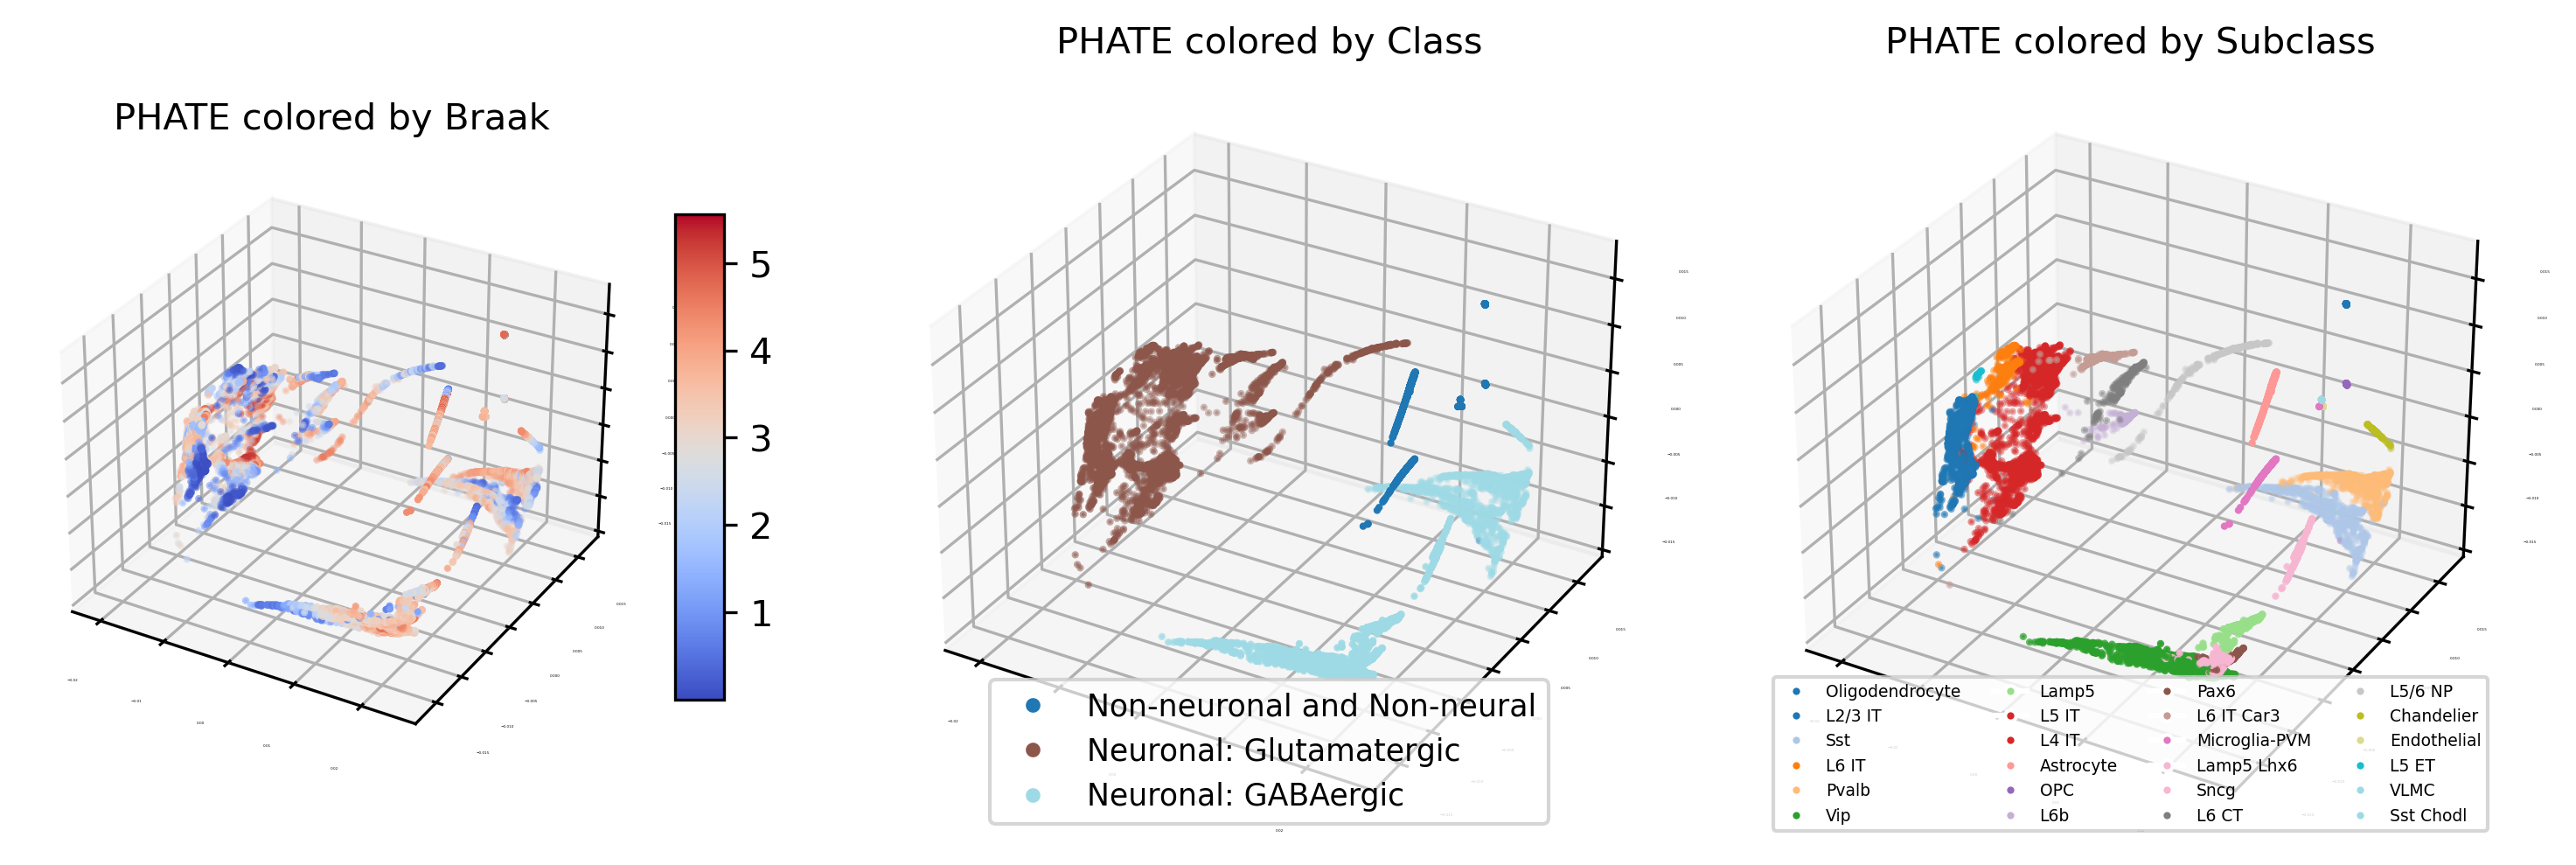

In [219]:
fig = plt.figure(figsize=(10, 4),dpi=300)  # Adjusted figure size for side-by-side subplots

# First subplot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

scatter1 = ax1.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], c=X_magic_brk, cmap='coolwarm',s=1)
plt.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=10)
ax1.set_title('PHATE colored by Braak', fontsize=10)
# Second subplot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')

classes = adata.obs["Class"].astype(str)
unique_classes = classes.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))
class_to_color = dict(zip(unique_classes, colors))
color_values = classes.map(class_to_color)
scatter2 = ax2.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=5)
                   for class_name, color in class_to_color.items()]
ax2.legend(handles=legend_elements, loc='lower center', fontsize='small')
ax2.set_title('PHATE colored by Class', fontsize=10)
# Third subplot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
subclasses = adata.obs["Subclass"].astype(str)
unique_subclasses = subclasses.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_subclasses)))
class_to_color = dict(zip(unique_subclasses, colors))
color_values = subclasses.map(class_to_color)

scatter3 = ax3.scatter(adata.obsm['X_phate'][:,0], adata.obsm['X_phate'][:,1], adata.obsm['X_phate'][:,2], 
                       c=color_values, s=1)  # s is the size of the point

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                              markerfacecolor=color, markersize=3)
                   for class_name, color in class_to_color.items()]
ax3.legend(handles=legend_elements, loc='lower center', fontsize=4.5, ncol=4)
ax3.set_title('PHATE colored by Subclass', fontsize=10)


ax1.tick_params(axis='x', labelsize=0)
ax1.tick_params(axis='y', labelsize=0)
ax1.tick_params(axis='z', labelsize=0)

ax2.tick_params(axis='x', labelsize=0)
ax2.tick_params(axis='y', labelsize=0)
ax2.tick_params(axis='z', labelsize=0)

ax3.tick_params(axis='x', labelsize=0)
ax3.tick_params(axis='y', labelsize=0)
ax3.tick_params(axis='z', labelsize=0)


plt.tight_layout()
plt.show()


In [236]:
X_magic_brk.index = adata.obs.index
adata.obs["Braak MAGIC Smoothed"] = X_magic_brk

In [237]:
adata.write_h5ad("adata_sea_ad_mtg_rna_phate_w_magic_smo_brk.h5ad")